<a href="https://colab.research.google.com/github/aniigupta/04819011721/blob/master/Temperature_Time_Series_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**UniqueID: IBM1437**

**EMAIL: Aniket8076206264@gmail.com**

In [ ]:
!pip install pandas matplotlib seaborn statsmodels prophet scikit-learn keras numpy

In [ ]:
"""Temperature Analysis and Forecasting.ipynb"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load data
data = pd.read_csv('/content/temperatures.csv')

In [ ]:
# Summary statistics
print(data.describe())

              YEAR         JAN         FEB         MAR         APR  \
count   117.000000  117.000000  117.000000  117.000000  117.000000   
mean   1959.000000   23.687436   25.597863   29.085983   31.975812   
std      33.919021    0.834588    1.150757    1.068451    0.889478   
min    1901.000000   22.000000   22.830000   26.680000   30.010000   
25%    1930.000000   23.100000   24.780000   28.370000   31.460000   
50%    1959.000000   23.680000   25.480000   29.040000   31.950000   
75%    1988.000000   24.180000   26.310000   29.610000   32.420000   
max    2017.000000   26.940000   29.720000   32.620000   35.380000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  117.000000  117.000000  117.000000  117.000000  117.000000  117.000000   
mean    33.565299   32.774274   31.035897   30.507692   30.486752   29.766581   
std      0.724905    0.633132    0.468818    0.476312    0.544295    0.705492   
min     31.930000   31.100000   29.760000   2

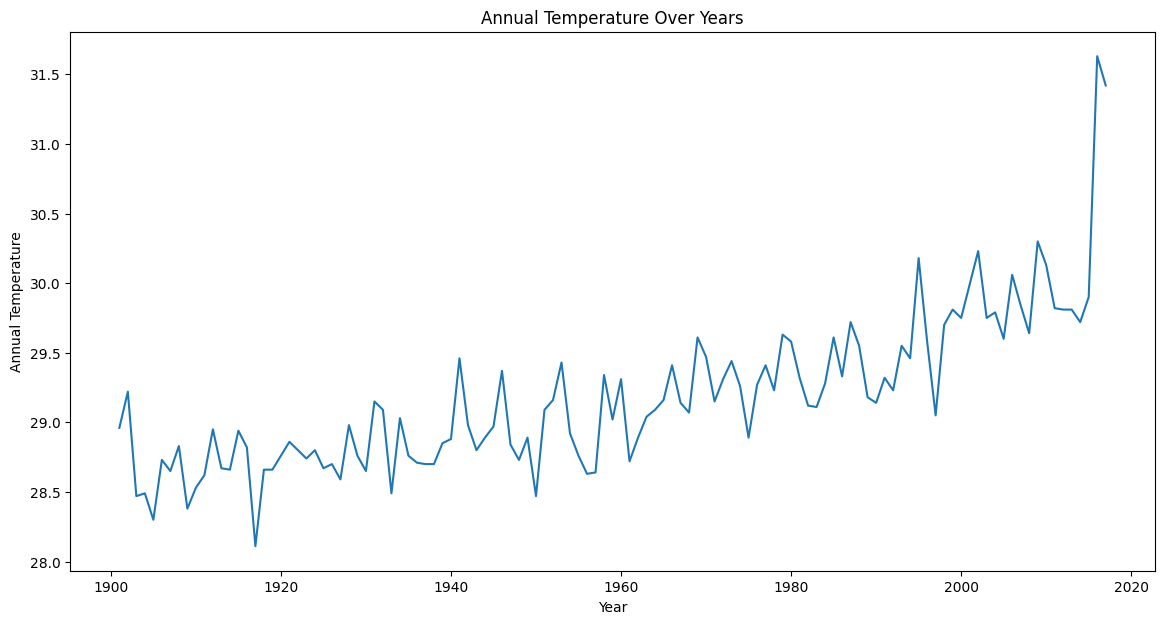

In [ ]:
# Line plot of annual temperatures
plt.figure(figsize=(14,7))
plt.plot(data['YEAR'], data['ANNUAL'])
plt.title('Annual Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.show()

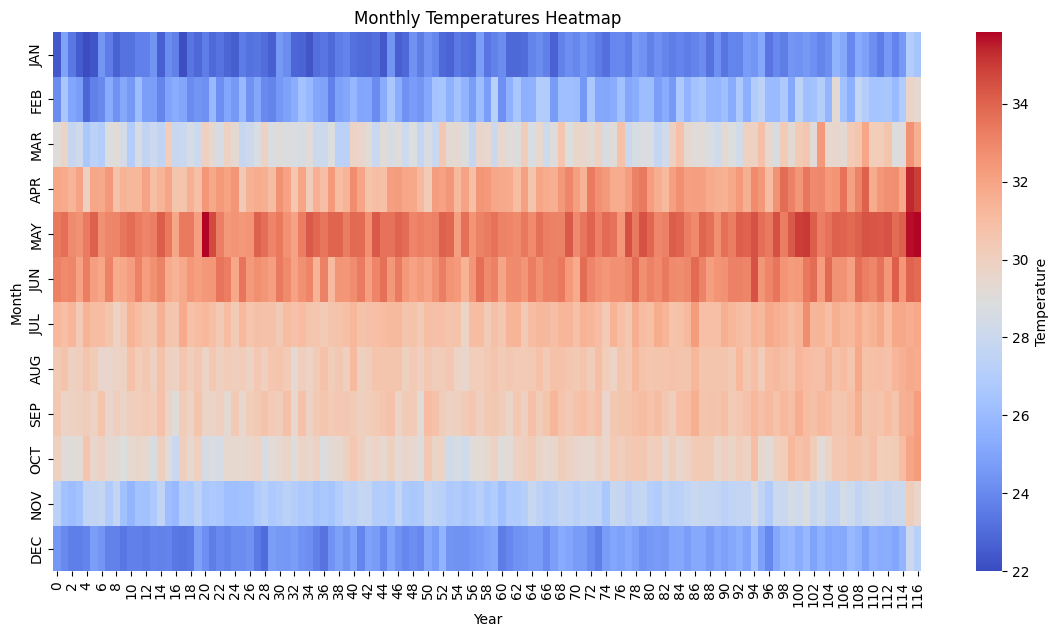

In [ ]:
# Heatmap of monthly temperatures
plt.figure(figsize=(14, 7))
sns.heatmap(data.iloc[:, 1:13].transpose(), cmap='coolwarm', cbar_kws={'label': 'Temperature'})
plt.title('Monthly Temperatures Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

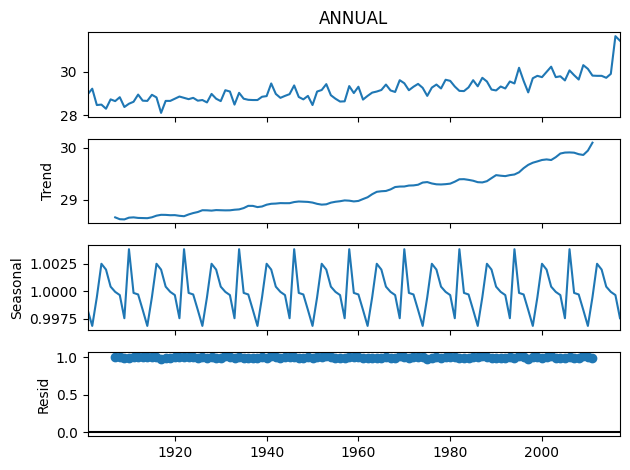

In [ ]:
# Time Series Decomposition
data.set_index('YEAR', inplace=True)
result = seasonal_decompose(data['ANNUAL'], model='multiplicative', period=12)
result.plot()
plt.show()

In [ ]:
# Check for stationarity
result = adfuller(data['ANNUAL'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 1.7108886309679334
p-value: 0.9981548879752816


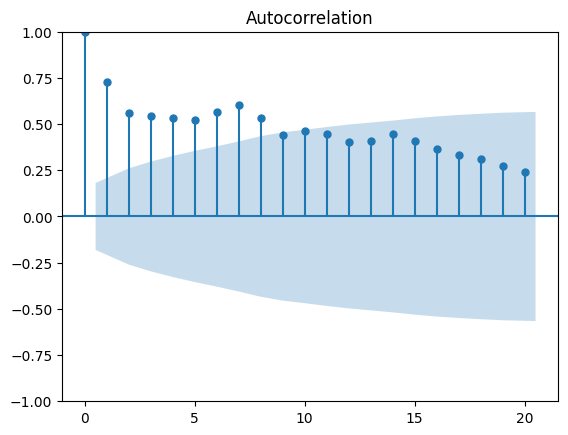

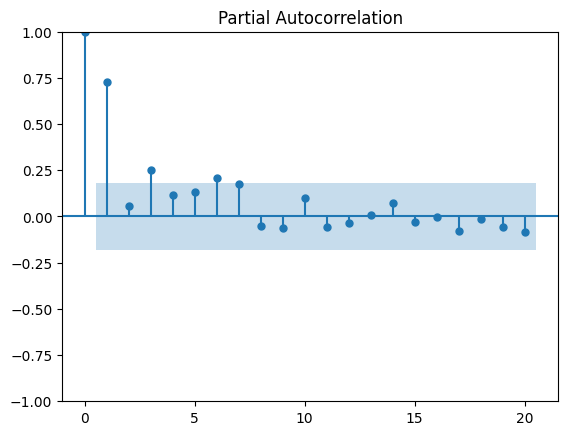

In [ ]:
# Plot ACF and PACF
plot_acf(data['ANNUAL'], lags=20)
plot_pacf(data['ANNUAL'], lags=20)
plt.show()

In [ ]:
# ARIMA Model for Forecasting (Answers: What are the future trends based on historical data?)
arima_model = ARIMA(data['ANNUAL'], order=(5, 1, 0))
model_fit = arima_model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 ANNUAL   No. Observations:                  117
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -28.238
Date:                Thu, 01 Aug 2024   AIC                             68.476
Time:                        08:45:29   BIC                             84.998
Sample:                             0   HQIC                            75.183
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4682      0.074     -6.335      0.000      -0.613      -0.323
ar.L2         -0.5128      0.126     -4.081      0.000      -0.759      -0.267
ar.L3         -0.4243      0.143     -2.971      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


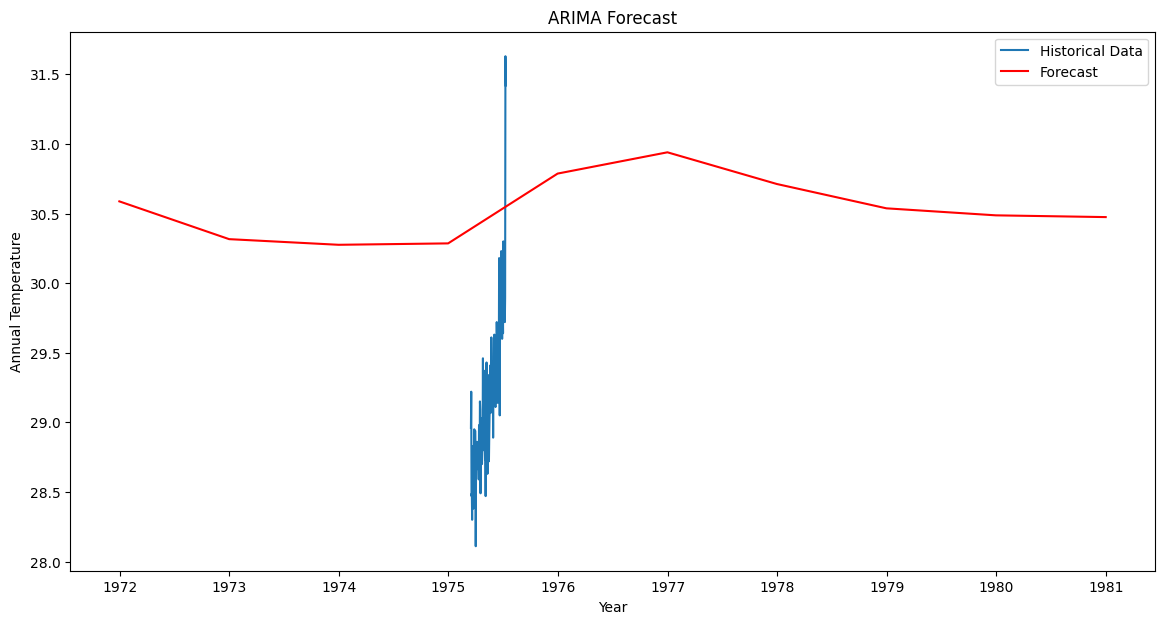

In [ ]:
# Forecast with ARIMA
forecast = model_fit.forecast(steps=10)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ANNUAL'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.legend()
plt.show()

In [ ]:
# SARIMA Model for Seasonality
model_sarima = SARIMAX(data['ANNUAL'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                               ANNUAL   No. Observations:                  117
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -40.442
Date:                              Thu, 01 Aug 2024   AIC                             96.884
Time:                                      08:45:30   BIC                            118.039
Sample:                                           0   HQIC                           105.454
                                              - 117                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4778      0.094     -5.068      0.000      -0.663      -0.293
ar.L2         -0.56

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


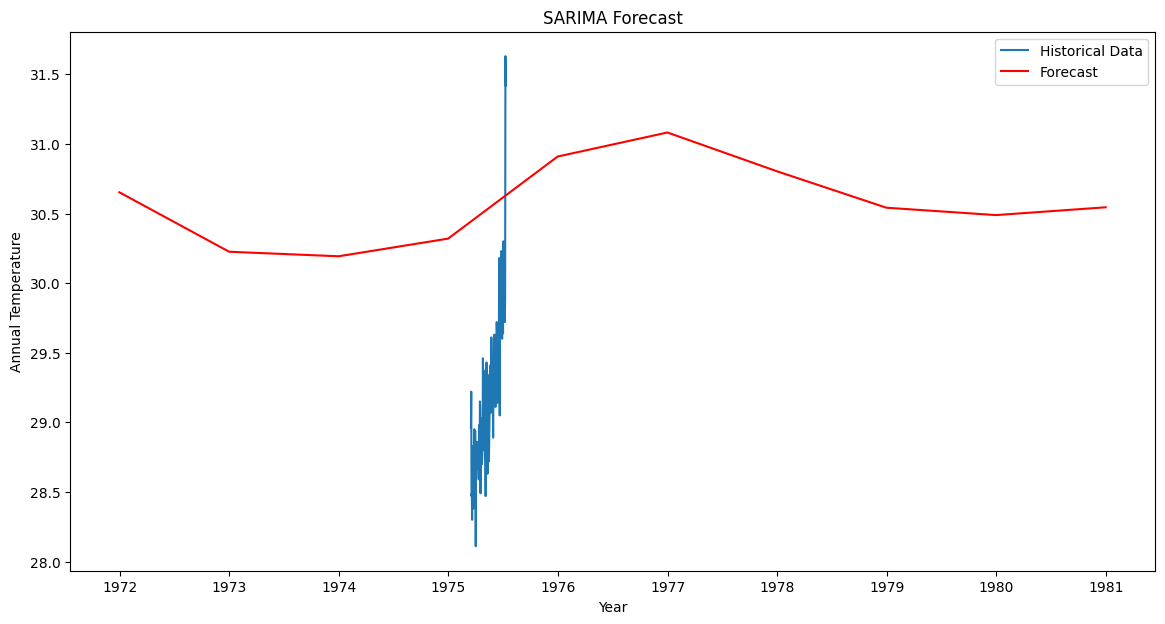

In [ ]:
# Forecast with SARIMA
forecast_sarima = model_fit_sarima.forecast(steps=10)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ANNUAL'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:], forecast_sarima, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.legend()
plt.show()

In [ ]:
# Prophet Model for Forecasting
prophet_data = data.reset_index().rename(columns={'YEAR': 'ds', 'ANNUAL': 'y'})
model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(prophet_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvgybdwkz/pmmqsb4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvgybdwkz/ew_r0xj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20956', 'data', 'file=/tmp/tmpvgybdwkz/pmmqsb4v.json', 'init=/tmp/tmpvgybdwkz/ew_r0xj3.json', 'output', 'file=/tmp/tmpvgybdwkz/prophet_modelodgbm3zt/prophet_model-20240801084530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:45:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


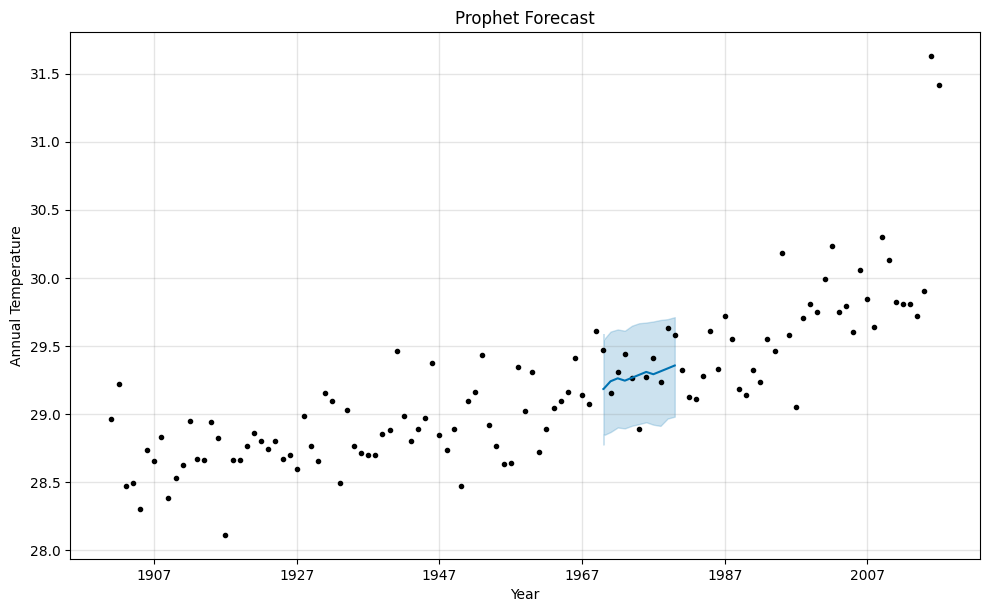

In [ ]:
# Forecast with Prophet
future = model_prophet.make_future_dataframe(periods=10, freq='Y')
forecast_prophet = model_prophet.predict(future)
fig = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.show()

In [ ]:
# LSTM for Time Series Prediction
data_values = data['ANNUAL'].values.reshape((len(data['ANNUAL']), 1))
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_values)

X, y = [], []
for i in range(5, len(scaled_data)):
    X.append(scaled_data[i-5:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 0.0925
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0635
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0381
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0279
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0197
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 12/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 13/50
4/4 [==============================] - 0s 4ms/step - loss: 0.

1/1 [==============================] - 0s 26ms/step


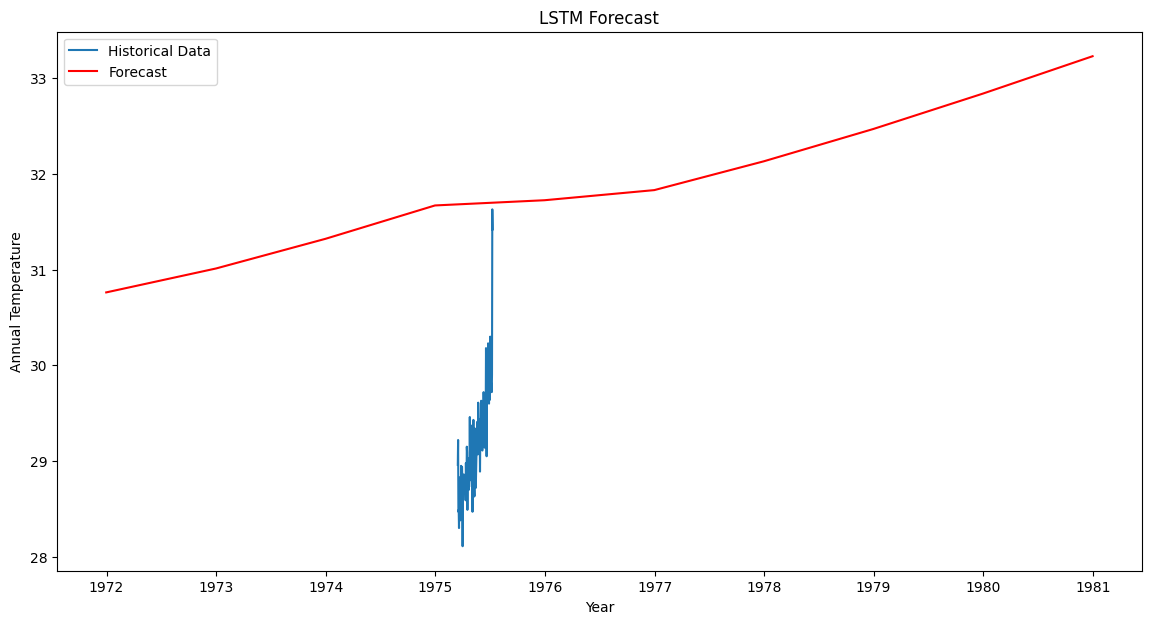

In [ ]:
# Forecast with LSTM
forecast_input = scaled_data[-5:]
forecast_output = []
for _ in range(10):
    forecast_input_reshaped = forecast_input.reshape((1, 5, 1))
    pred = model_lstm.predict(forecast_input_reshaped)
    forecast_output.append(pred[0, 0])
    forecast_input = np.append(forecast_input[1:], pred[0, 0])
forecast_output = scaler.inverse_transform(np.array(forecast_output).reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.plot(data.index, data_values, label='Historical Data')
forecast_dates = pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:]
plt.plot(forecast_dates, forecast_output, label='Forecast', color='red')
plt.title('LSTM Forecast')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.legend()
plt.show()

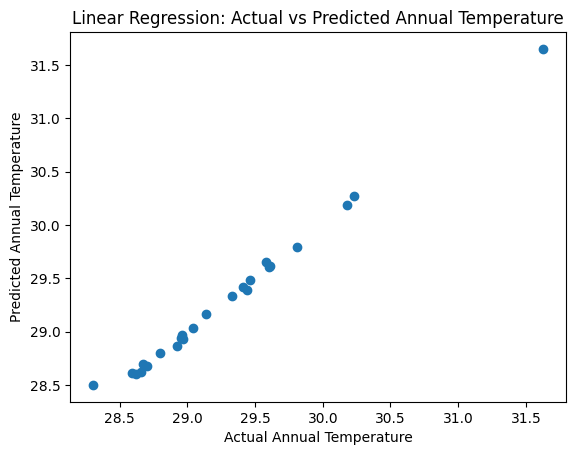

In [ ]:
# Linear Regression
X = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = data['ANNUAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Annual Temperature")
plt.ylabel("Predicted Annual Temperature")
plt.title("Linear Regression: Actual vs Predicted Annual Temperature")
plt.show()

In [ ]:
# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(f'Random Forest - Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}, R-squared: {r2_score(y_test, y_pred_rf)}')

Random Forest - Mean Squared Error: 0.07005331999999803, R-squared: 0.8551070633251789


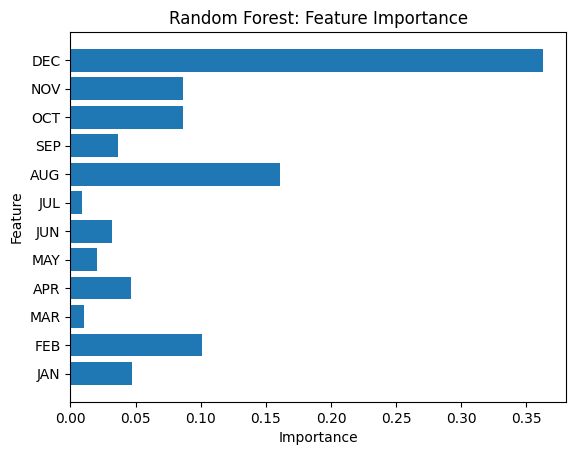

In [ ]:
# Feature Importance
importances = model_rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest: Feature Importance')
plt.show()

In [ ]:
# K-Nearest Neighbors (KNN)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(f'KNN - Mean Squared Error: {mean_squared_error(y_test, y_pred_knn)}, R-squared: {r2_score(y_test, y_pred_knn)}')


KNN - Mean Squared Error: 0.08495683333333376, R-squared: 0.8242817746216681


In [ ]:
# Support Vector Regressor (SVR)
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
print(f'SVR - Mean Squared Error: {mean_squared_error(y_test, y_pred_svr)}, R-squared: {r2_score(y_test, y_pred_svr)}')

SVR - Mean Squared Error: 0.03466524054417462, R-squared: 0.9283010640611369


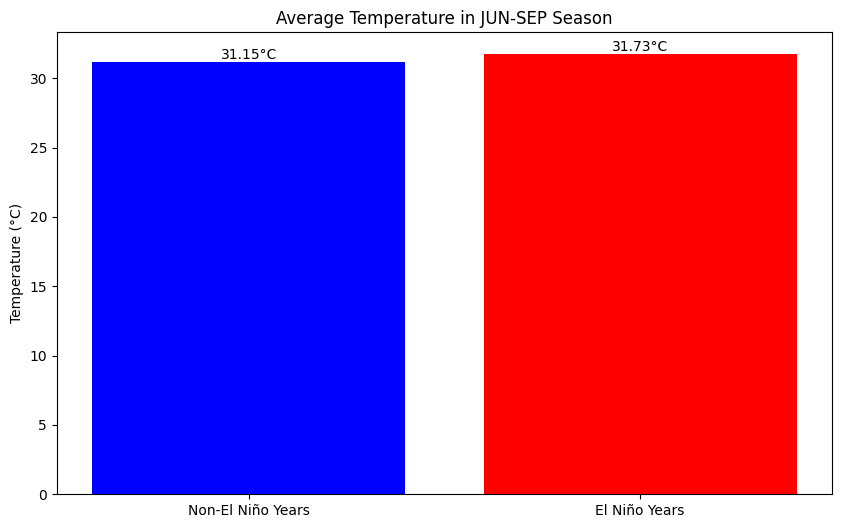

The season most affected by El Niño is: JUN-SEP
Temperature difference: 0.58°C


In [ ]:
# Define El Niño years
el_nino_years = [1957, 1965, 1972, 1982, 1987, 1991, 1997, 2002, 2009, 2015]

# Create boolean mask for El Niño years
el_nino_mask = data.index.isin(el_nino_years)

# Analyze seasonal impact of El Niño
seasons = ['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']
el_nino_impact = {}

for season in seasons:
    el_nino_impact[season] = data.loc[el_nino_mask, season].mean() - data.loc[~el_nino_mask, season].mean()

# Find the season with the largest impact
max_impact_season = max(el_nino_impact, key=el_nino_impact.get)

# Visualize the impact for the most affected season
plt.figure(figsize=(10, 6))
plt.bar(['Non-El Niño Years', 'El Niño Years'],
        [data.loc[~el_nino_mask, max_impact_season].mean(),
         data.loc[el_nino_mask, max_impact_season].mean()],
        color=['blue', 'red'])
plt.title(f'Average Temperature in {max_impact_season} Season')
plt.ylabel('Temperature (°C)')
plt.text(0, data.loc[~el_nino_mask, max_impact_season].mean(),
         f"{data.loc[~el_nino_mask, max_impact_season].mean():.2f}°C",
         ha='center', va='bottom')
plt.text(1, data.loc[el_nino_mask, max_impact_season].mean(),
         f"{data.loc[el_nino_mask, max_impact_season].mean():.2f}°C",
         ha='center', va='bottom')
plt.show()

print(f"The season most affected by El Niño is: {max_impact_season}")
print(f"Temperature difference: {el_nino_impact[max_impact_season]:.2f}°C")

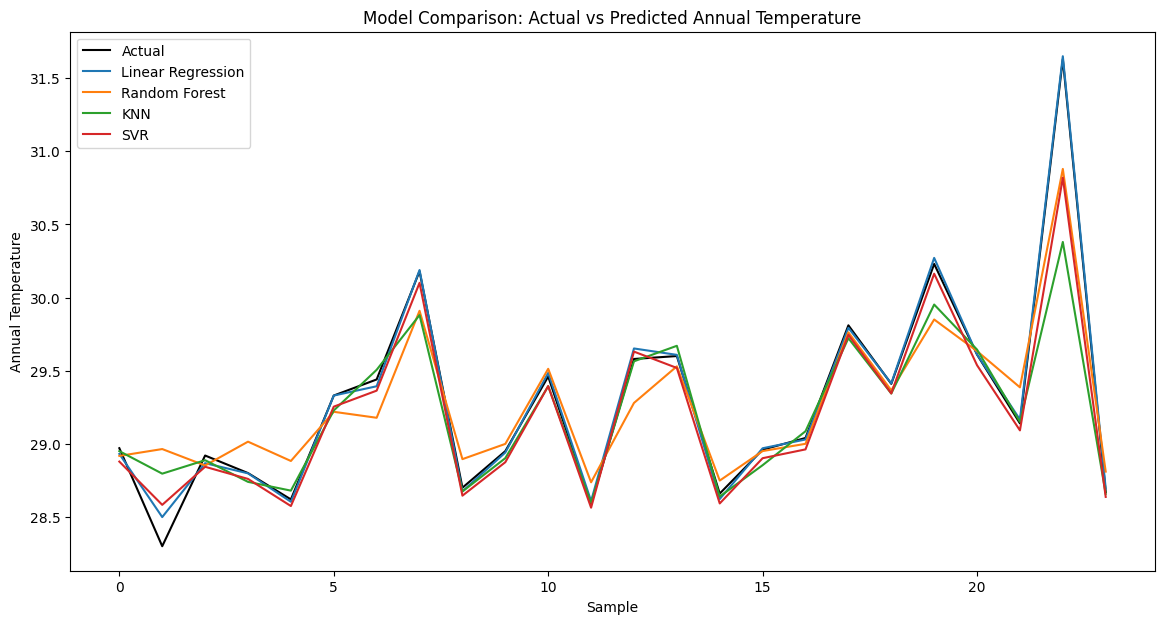

In [ ]:
# Plotting Model Comparisons
results = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'SVR': y_pred_svr
}

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='black')
for name, y_pred in results.items():
    plt.plot(y_pred, label=name)
plt.xlabel("Sample")
plt.ylabel("Annual Temperature")
plt.title("Model Comparison: Actual vs Predicted Annual Temperature")
plt.legend()
plt.show()